In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from lensim.host import Host
from lensim.simulator import Simulator
from lensim.utils import jain, tail, microsec, kB, Gbps

### 1. Prepare trainning dataset.

In [3]:
packet_size = 8000 # 1Kb
n_hosts = 100
n_loops = 100_000
cable_delay = 50
target_delay = 400

In [7]:
%%time
net = Simulator(logger=True)
for _ in range(n_hosts):
    net.add(Host((0, n_loops), cable_delay, target_delay, cwnd=1.5))
lenq, t_acks, cwnds, rtts, throughputs = net.simulate(n_loops, settling=n_loops//2)
all_rtts = np.concatenate(rtts)
tail99 = tail(all_rtts, 0.99)
print("=== Simulation results ===")
print(f'Throughput: {50*throughputs.sum():.1f} Gbps')
print(f"Mean RTT: {np.mean(all_rtts)*1.6e-07/microsec:.1f} us")
print(f"99th-p RTT: {tail99*1.6e-07/microsec:.1f} us")
print(f"Jain's fairness: J={jain(throughputs):.3f}")

Log saved to 1733418543
[0]
=== Simulation results ===
Throughput: 50.0 Gbps
Mean RTT: 28.7 us
99th-p RTT: 34.8 us
Jain's fairness: J=0.999
CPU times: total: 1.06 s
Wall time: 2.75 s


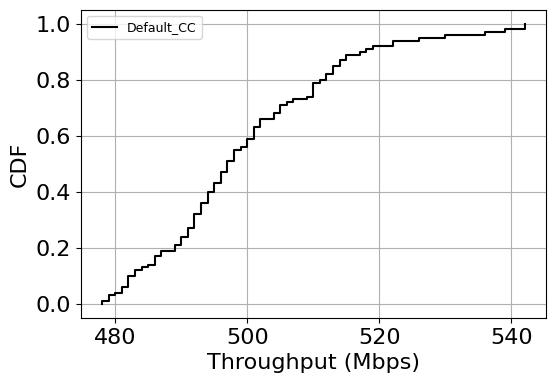

In [8]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1,1, figsize=(6, 4), dpi=100)
ax.ecdf(50e3*throughputs, c='k', label='Default_CC')
ax.grid()
ax.set_ylim([-0.05,1.05])
ax.set_xlabel('Throughput (Mbps)')
ax.set_ylabel('CDF')
ax.legend(loc = 'upper left', fontsize=9)

### 2. Train model

...